SNA Project Round - 1 

Team: TekloTekloTingTiiiing

Members: 

1) 21ucs204 - Sindhi Krish Kamal
2) 21ucs158 - Prashant Singh Shekhawat
3) 21ucs237 - Yashodhan Sonune
4) 21ucs183 - Sarvagya Acharya

Datasets chosen:
- Air Traffic Control ( http://konect.cc/networks/maayan-faa/ )
- Yeast network ( http://konect.cc/networks/moreno_propro/ )


In [1]:
#importing all the important libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import snap
import random


In [2]:
#Function to load the undirected datasets
def load_Undirected_Graph(file_path):
    """
    Load dataset from file path
    """
    # Depending on the format of your dataset, you might need to adjust the loading method
    # For example, if it's an edgelist, you can use nx.read_edgelist()
    G = nx.read_edgelist(file_path)
    return G

In [3]:

#Function to load the directed datasets
def load_Directed_graph(file_path):
    """
    Load dataset from file path
    """
    # Depending on the format of your dataset, you might need to adjust the loading method
    # For example, if it's an edgelist, you can use nx.read_edgelist()
    G = nx.read_edgelist(file_path, create_using=nx.DiGraph())
    return G

In [4]:
# Function to summarize network statistics
def summarize_network_stats(G):
    """
    Summarize network statistics
    """
    # Degree distribution
    degrees = dict(G.degree())
    degree_values = list(degrees.values())
    max_degree = max(degree_values)
    min_degree = min(degree_values)
    avg_degree = sum(degree_values) / len(G)
    std_degree = pd.Series(degree_values).std()

    # Plot degree distribution
    # plt.hist(degree_values, bins=20, color='skyblue')
    # plt.title("Degree Distribution")
    # plt.xlabel("Degree")
    # plt.ylabel("Frequency")
    # plt.show()

    # Plot kernel density estimation (KDE) plot of node degree
    sns.kdeplot(degree_values, color='skyblue', fill=True)
    plt.xlabel('Degree')
    plt.ylabel('Density')
    plt.title('Node Degree Distribution (KDE plot)')
    plt.show()


    # Output statistics
    print("Max Degree:", max_degree)
    print("Min Degree:", min_degree)
    print("Average Degree:", avg_degree)
    print("Standard Deviation of Degree Distribution:", std_degree)


In [5]:
# Function to calculate centrality measures
def calculate_centrality_measures(G):
    """
    Calculate centrality measures
    """
    # Degree centrality
    degree_centrality = nx.degree_centrality(G)
    print("Degree Centrality:")
    print(degree_centrality)

    # Plot histogram of degree centrality
    plt.hist(degree_centrality.values(), bins=20, color='skyblue')
    plt.title("Degree Centrality Distribution")
    plt.xlabel("Degree Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Eigenvector centrality
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    print("\nEigenvector Centrality:")
    print(eigenvector_centrality)

    # Plot histogram of eigenvector centrality
    plt.hist(eigenvector_centrality.values(), bins=20, color='skyblue')
    plt.title("Eigenvector Centrality Distribution")
    plt.xlabel("Eigenvector Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Katz centrality
    katz_centrality = nx.katz_centrality(G)
    print("\nKatz Centrality:")
    print(katz_centrality)

    # Plot histogram of Katz centrality
    plt.hist(katz_centrality.values(), bins=20, color='skyblue')
    plt.title("Katz Centrality Distribution")
    plt.xlabel("Katz Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # PageRank centrality
    pagerank_centrality = nx.pagerank(G)
    print("\nPageRank Centrality:")
    print(pagerank_centrality)

    # Plot histogram of PageRank centrality
    plt.hist(pagerank_centrality.values(), bins=20, color='skyblue')
    plt.title("PageRank Centrality Distribution")
    plt.xlabel("PageRank Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Clustering coefficients
    local_clustering = nx.clustering(G)
    global_clustering = nx.average_clustering(G)
    print("\nLocal Clustering Coefficients:")
    print(local_clustering)
    print("\nGlobal Clustering Coefficient:")
    print(global_clustering)

    # Plot histogram of local clustering coefficients
    plt.hist(local_clustering.values(), bins=20, color='skyblue')
    plt.title("Local Clustering Coefficients Distribution")
    plt.xlabel("Local Clustering Coefficients")
    plt.ylabel("Frequency")
    plt.show()

    # Betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    print("\nBetweenness Centrality:")
    print(betweenness_centrality)

    # Plot histogram of betweenness centrality
    plt.hist(betweenness_centrality.values(), bins=20, color='skyblue')
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Betweenness Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    print("\nCloseness Centrality:")
    print(closeness_centrality)

    # Plot histogram of closeness centrality
    plt.hist(closeness_centrality.values(), bins=20, color='skyblue')
    plt.title("Closeness Centrality Distribution")
    plt.xlabel("Closeness Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Reciprocity
    reciprocity = nx.reciprocity(G)
    print("\nReciprocity:")
    print(reciprocity)

    # Transitivity
    transitivity = nx.transitivity(G)
    print("\nTransitivity:")
    print(transitivity)

In [6]:
# Function to visualize centrality measures
def visualize_centrality_measures_snap(G, centrality_measure):
    # Calculate centrality measure
    if centrality_measure == "Degree Centrality":
        centrality_values = snap.TIntFltH()
        for Node in G.Nodes():
            centrality_values[Node.GetId()] = G.GetDegreeCentr(Node.GetId())
        #snap.GetDegreeCentr(G, centrality_values)
    elif centrality_measure == "Eigenvector Centrality":
        centrality_values = snap.TIntFltH()
        snap.GetEigenVectorCentr(G, centrality_values)
    elif centrality_measure == "Katz Centrality":
        centrality_values = snap.TIntFltH()
        snap.GetKatzCentr(G, centrality_values)
    elif centrality_measure == "PageRank Centrality":
        centrality_values = snap.TIntFltH()
        snap.GetPageRank(G, centrality_values)
    elif centrality_measure == "Betweenness Centrality":
        Nodes, Edges = snap.GetBetweennessCentr(G, centrality_values)
    elif centrality_measure == "Closeness Centrality":
        centrality_values = snap.TIntFltH()
        snap.GetClosenessCentr(G, centrality_values)
    elif centrality_measure == "Reciprocity":
        reciprocity = snap.GetReciprocity(G)
        centrality_values = {node: reciprocity for node in G.Nodes()}
    elif centrality_measure == "Transitivity":
        transitivity = snap.GetClustCf(G)
        centrality_values = {node: transitivity for node in G.Nodes()}
    
    # Draw graph with node attributes
    labels = snap.TIntStrH()
    for node in G.Nodes():
        labels[node.GetId()] = str(node.GetId())
    snap.DrawGVizAttributes(G, snap.gvlDot, "graph.png", centrality_measure, labels)


In [7]:
# Function to visualize centrality measures
def visualize_centrality_measures(G, centrality_measures):
    num_nodes_to_keep = 100  # Number of nodes to keep in the subsampled graph
    subgraph_nodes = random.sample(G.nodes(), num_nodes_to_keep)  # Randomly select nodes
    subgraph = G.subgraph(subgraph_nodes)  
    for centrality_measure in centrality_measures:
        # Calculate centrality values
        if centrality_measure == "Degree Centrality":
            centrality_values = nx.degree_centrality(subgraph)
        elif centrality_measure == "Eigenvector Centrality":
            centrality_values = nx.eigenvector_centrality(subgraph, max_iter=1000)
        elif centrality_measure == "Katz Centrality":
            centrality_values = nx.katz_centrality(subgraph)
        elif centrality_measure == "PageRank Centrality":
            centrality_values = nx.pagerank(subgraph)
        elif centrality_measure == "Local Clustering Coefficients":
            centrality_values = nx.clustering(subgraph)
        elif centrality_measure == "Global Clustering Coefficient":
            centrality_values = nx.average_clustering(subgraph)
        elif centrality_measure == "Betweenness Centrality":
            centrality_values = nx.betweenness_centrality(subgraph)
        elif centrality_measure == "Closeness Centrality":
            centrality_values = nx.closeness_centrality(subgraph)
        elif centrality_measure == "Reciprocity":
            centrality_values = nx.reciprocity(subgraph)
        elif centrality_measure == "Transitivity":
            centrality_values = nx.transitivity(subgraph)
        else:
            print("Invalid centrality measure:", centrality_measure)
            continue
        
        # Define node colors or sizes based on centrality values
        node_colors = [centrality_values[node] for node in subgraph.nodes()]
        node_sizes = [1000 * centrality_values[node] for node in subgraph.nodes()]
        
        # Draw the graph with node attributes
        pos = nx.spring_layout(subgraph)  # Define node positions using a layout algorithm
        nx.draw(subgraph, pos, node_color=node_colors, node_size=node_sizes, with_labels=True)
        plt.title(centrality_measure)
        plt.show()


Dataset 1 Statistics:


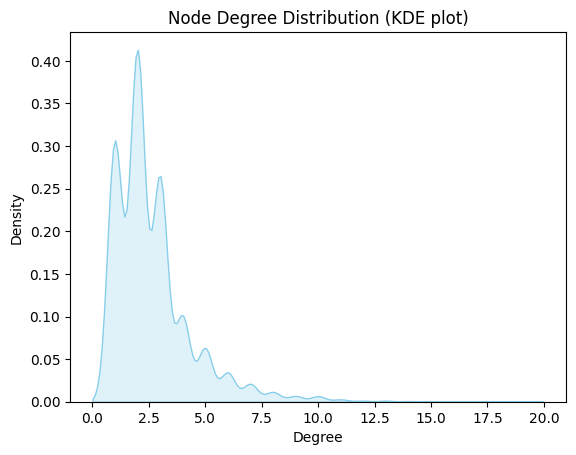

Max Degree: 19
Min Degree: 1
Average Degree: 2.66909532483303
Standard Deviation of Degree Distribution: 1.791453555444906

Dataset 2 Statistics:


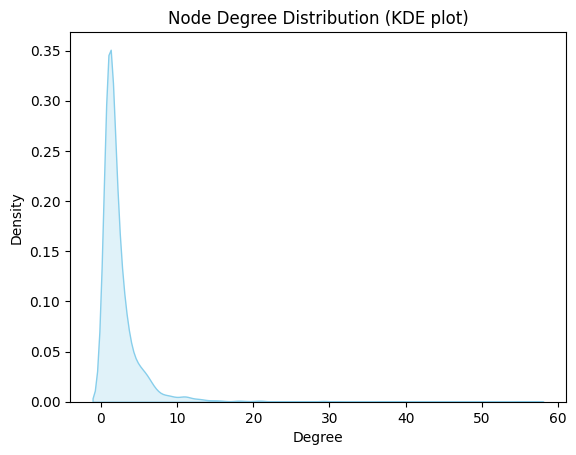

Max Degree: 56
Min Degree: 1
Average Degree: 2.4352941176470586
Standard Deviation of Degree Distribution: 3.1646176740852674
Dataset 1 centrality measures:
Degree Centrality:
{'1': 0.0006072874493927125, '2': 0.001214574898785425, '3': 0.0010121457489878543, '4': 0.0006072874493927125, '428': 0.0004048582995951417, '435': 0.00020242914979757084, '436': 0.00020242914979757084, '437': 0.0004048582995951417, '438': 0.0004048582995951417, '432': 0.0010121457489878543, '458': 0.0006072874493927125, '459': 0.0006072874493927125, '460': 0.0008097165991902834, '478': 0.0008097165991902834, '523': 0.0004048582995951417, '5': 0.0008097165991902834, '6': 0.0006072874493927125, '7': 0.0004048582995951417, '8': 0.0004048582995951417, '9': 0.0006072874493927125, '3644': 0.0010121457489878543, '3680': 0.0004048582995951417, '3397': 0.0018218623481781376, '3751': 0.0006072874493927125, '3830': 0.00020242914979757084, '10': 0.00020242914979757084, '11': 0.0006072874493927125, '3454': 0.000607287449392

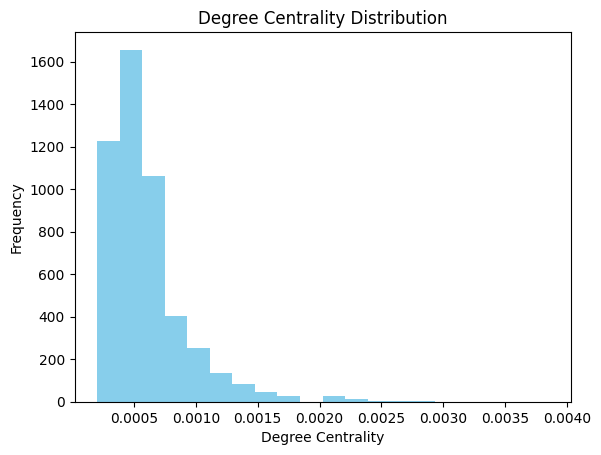


Eigenvector Centrality:
{'1': 1.3892164567462327e-08, '2': 7.916086004910193e-09, '3': 4.8447557541792375e-08, '4': 4.0840307924237794e-09, '428': 6.017445792882445e-09, '435': 1.8269478004036125e-09, '436': 1.8269478004036125e-09, '437': 3.1202961476570023e-09, '438': 7.672198058673608e-09, '432': 1.1253086717720877e-07, '458': 1.484442248906958e-08, '459': 1.5458632998504535e-08, '460': 5.4513692567456967e-08, '478': 2.790914861046223e-09, '523': 1.0057349942784897e-09, '5': 2.3235633746533013e-09, '6': 8.16501149273132e-10, '7': 3.798240283731303e-09, '8': 3.798240283731303e-09, '9': 8.512608457839846e-10, '3644': 7.034712597569742e-10, '3680': 2.2018193925831938e-10, '3397': 1.288845382729702e-08, '3751': 8.236632593469474e-10, '3830': 2.1620318188503715e-10, '10': 3.482451196918344e-10, '11': 1.349619872420758e-09, '3454': 8.104786863077784e-10, '3535': 4.089327124050963e-09, '12': 1.8725210614755356e-12, '13': 7.424266738707655e-12, '4935': 1.8725210614755356e-12, '4936': 2.5718

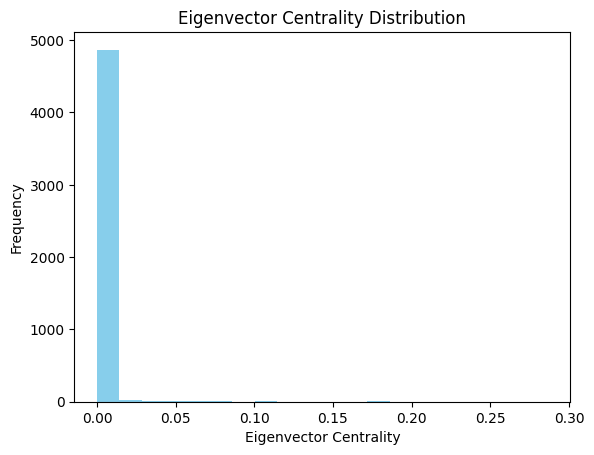


Katz Centrality:
{'1': 0.014243521350533615, '2': 0.016925517082214195, '3': 0.01719865212822854, '4': 0.013552252123689573, '428': 0.01295822480428886, '435': 0.011168430925343304, '436': 0.011168430925343304, '437': 0.012542823972384367, '438': 0.01241494667303718, '432': 0.018572410348309802, '458': 0.013908567215943624, '459': 0.013995510590583408, '460': 0.01650771960575478, '478': 0.01450173667599368, '523': 0.012018471039152316, '5': 0.014831645446395767, '6': 0.013756462700833999, '7': 0.013189165775589935, '8': 0.013189165775589935, '9': 0.013422868040724203, '3644': 0.016055893018079546, '3680': 0.011918296372644145, '3397': 0.022301220138285074, '3751': 0.013820076768431186, '3830': 0.010818166021194514, '10': 0.010868035539750008, '11': 0.013921563226279186, '3454': 0.013535085618110534, '3535': 0.020053718933711027, '12': 0.010758077739355516, '13': 0.0128219852223341, '4935': 0.010758077739355516, '4936': 0.011944904573408906, '14': 0.011486563501462075, '15': 0.02010684

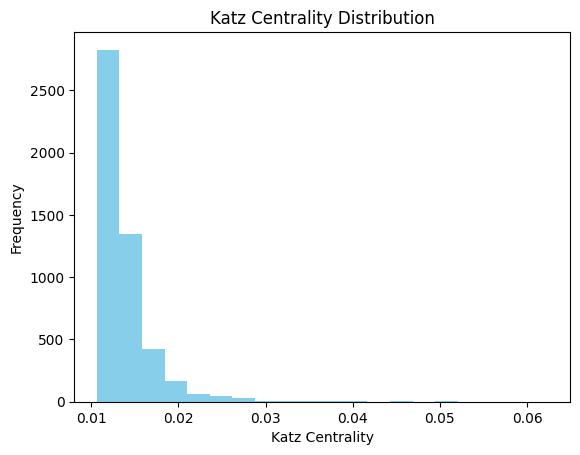


PageRank Centrality:
{'1': 0.0002113666026288283, '2': 0.00044504454797400544, '3': 0.0003176075156790859, '4': 0.000232196480752402, '428': 0.0001462106382901514, '435': 9.280899475355455e-05, '436': 9.280899475355455e-05, '437': 0.00015272164929764872, '438': 0.0001569789080969692, '432': 0.0002929865359756638, '458': 0.00021316408699753364, '459': 0.00021005945740175123, '460': 0.0002616129175971004, '478': 0.00031135460012917873, '523': 0.00017289314775330406, '5': 0.0002956985980249827, '6': 0.00023903802441346854, '7': 0.00014817296441255173, '8': 0.00014817296441255173, '9': 0.0002485646817974187, '3644': 0.000380347507381817, '3680': 0.00019526800448312412, '3397': 0.0005875057793011562, '3751': 0.0002466029882202597, '3830': 0.00010087199769790928, '10': 0.00010033123968078386, '11': 0.00024370000558305698, '3454': 0.00025363885333900486, '3535': 0.0005537733717703047, '12': 0.00012191828176637828, '13': 0.00033365904628112166, '4935': 0.00012191828176637828, '4936': 0.000204

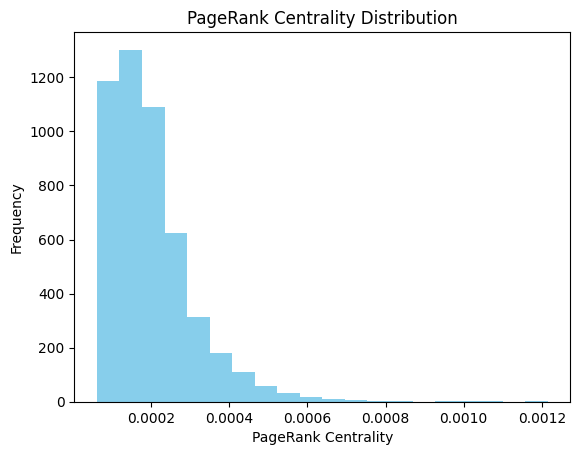


Local Clustering Coefficients:
{'1': 0, '2': 0, '3': 0, '4': 0, '428': 0, '435': 0, '436': 0, '437': 0, '438': 0, '432': 0.1, '458': 0, '459': 0, '460': 0.16666666666666666, '478': 0, '523': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '3644': 0.1, '3680': 0, '3397': 0.027777777777777776, '3751': 0, '3830': 0, '10': 0, '11': 0, '3454': 0, '3535': 0, '12': 0, '13': 0, '4935': 0, '4936': 0, '14': 0, '15': 0, '115': 0, '119': 0, '125': 0.13333333333333333, '171': 0, '173': 0, '174': 0, '175': 0, '16': 0, '17': 0, '18': 0, '32': 0, '33': 0, '34': 0, '35': 0, '47': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '131': 0, '132': 0, '106': 0, '67': 0, '198': 0.1, '205': 0, '226': 0.06666666666666667, '31': 0, '61': 0.2, '29': 0, '30': 0.047619047619047616, '59': 0.3333333333333333, '60': 0.6666666666666666, '99': 0, '177': 0, '178': 0, '179': 0, '36': 0, '37': 0, '38': 0, '39': 0, '96': 0, '167': 0, '44': 0, '68': 0, '117': 0, '40': 0, '41': 0, '42

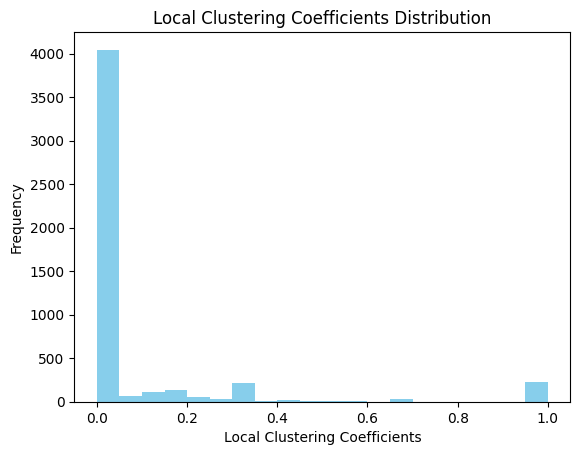


Betweenness Centrality:
{'1': 0.0025152991408275414, '2': 0.0013065726925608125, '3': 0.037108352715456594, '4': 0.00117973744149486, '428': 0.0007509532211251762, '435': 0.0, '436': 0.0, '437': 1.8275458148238992e-05, '438': 8.330599709532407e-05, '432': 0.13164241799743562, '458': 0.002654800104636076, '459': 0.03194641008287064, '460': 0.0042437280065838676, '478': 0.0005115740459566629, '523': 0.0005180484888797013, '5': 0.005203909508155117, '6': 0.0020161062976362613, '7': 0.002791370543837826, '8': 0.002791370543837826, '9': 0.0025545756670236224, '3644': 0.0024771043090686933, '3680': 0.0004048582995951417, '3397': 0.010326037781016857, '3751': 0.001779489384962779, '3830': 0.0, '10': 0.0, '11': 0.00043116460427083166, '3454': 0.0005834637036166959, '3535': 0.002100701977664129, '12': 0.0, '13': 0.0008096346274754433, '4935': 0.0, '4936': 0.0012140830684963847, '14': 0.0, '15': 0.0035118432436856964, '115': 0.0002917989521574944, '119': 6.012853449643261e-05, '125': 0.00386870

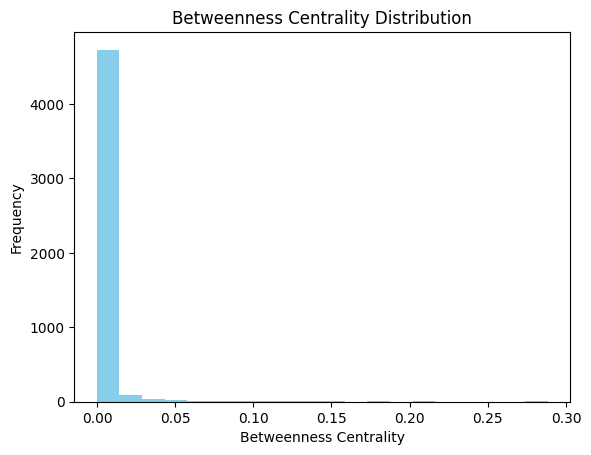


Closeness Centrality:
{'1': 0.06608784064000857, '2': 0.06365159128978225, '3': 0.07071285427998855, '4': 0.06203536266827406, '428': 0.06519472635371439, '435': 0.05984324461834789, '436': 0.05984324461834789, '437': 0.06149020388857079, '438': 0.06136722195306774, '432': 0.07477031588188106, '458': 0.06789631380741637, '459': 0.06782639737481636, '460': 0.06612322477880844, '478': 0.0599129200878076, '523': 0.05841798422477916, '5': 0.04575853572685674, '6': 0.04378501028150039, '7': 0.04790210129258099, '8': 0.04790210129258099, '9': 0.043809861653068466, '3644': 0.04347596500800873, '3680': 0.04194937203318586, '3397': 0.05027887473028539, '3751': 0.04204684733760044, '3830': 0.04197146959617329, '10': 0.039840958763801185, '11': 0.04149377593360996, '3454': 0.043072630569360885, '3535': 0.043280561420723854, '12': 0.039694337530433665, '13': 0.04133476136287569, '4935': 0.039694337530433665, '4936': 0.04311511036246367, '14': 0.05220938712097993, '15': 0.05508474576271186, '115':

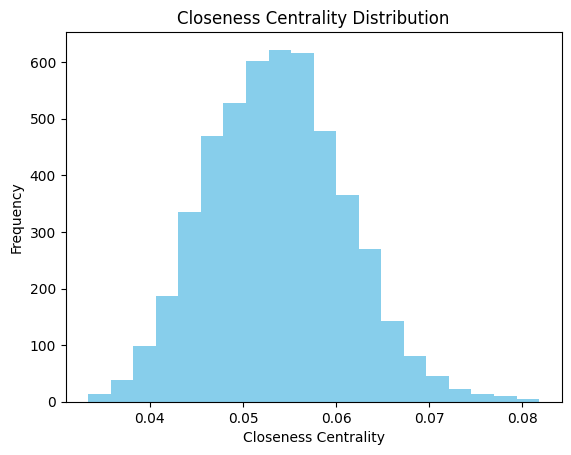


Reciprocity:
0.0

Transitivity:
0.10315322452860086

Dataset 2 centrality measures:
Degree Centrality:
{'1': 0.002675227394328518, '2': 0.003210272873194221, '3': 0.010700909577314071, '4': 0.001070090957731407, '5': 0.002675227394328518, '6': 0.001070090957731407, '113': 0.0016051364365971105, '114': 0.002675227394328518, '115': 0.001070090957731407, '116': 0.0005350454788657035, '117': 0.0005350454788657035, '14': 0.0005350454788657035, '139': 0.001070090957731407, '255': 0.0016051364365971105, '283': 0.0005350454788657035, '319': 0.002675227394328518, '487': 0.0016051364365971105, '530': 0.001070090957731407, '642': 0.002140181915462814, '816': 0.002140181915462814, '823': 0.0005350454788657035, '1031': 0.002675227394328518, '1082': 0.0016051364365971105, '1374': 0.001070090957731407, '1406': 0.002675227394328518, '1425': 0.0005350454788657035, '1435': 0.003210272873194221, '1436': 0.0005350454788657035, '1437': 0.003210272873194221, '1438': 0.0005350454788657035, '1448': 0.0026752

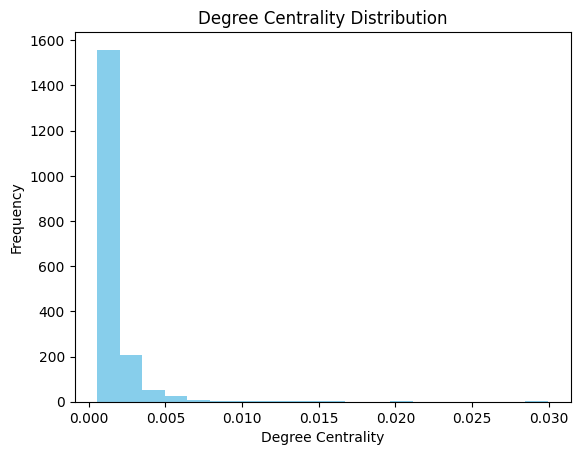


Eigenvector Centrality:
{'1': 0.001365010273514346, '2': 0.003897997789132275, '3': 0.0055095934892265205, '4': 0.00018587511654985135, '5': 0.0004728617390051453, '6': 0.00022230456750394923, '113': 0.017246752212175934, '114': 0.0020204749762615304, '115': 0.007715348508249009, '116': 0.0005171459905277541, '117': 0.0005171459905277541, '14': 0.0007309904150070346, '139': 0.0014831296887425859, '255': 0.0017200866888539617, '283': 0.0007309904150070346, '319': 0.0015257700118075535, '487': 0.000861120149958984, '530': 0.0011457071770128613, '642': 0.0007720060032372765, '816': 0.002039682413558195, '823': 0.0007309904150070346, '1031': 0.0022272684704921614, '1082': 0.0029633278439529427, '1374': 0.015233327664769522, '1406': 0.002631763805475656, '1425': 0.0007309904150070346, '1435': 0.002174835979463302, '1436': 0.0007309904150070346, '1437': 0.0009987216290216483, '1438': 0.0007309904150070346, '1448': 3.596858629989151e-05, '664': 0.001973813222534286, '801': 6.502491460795748e

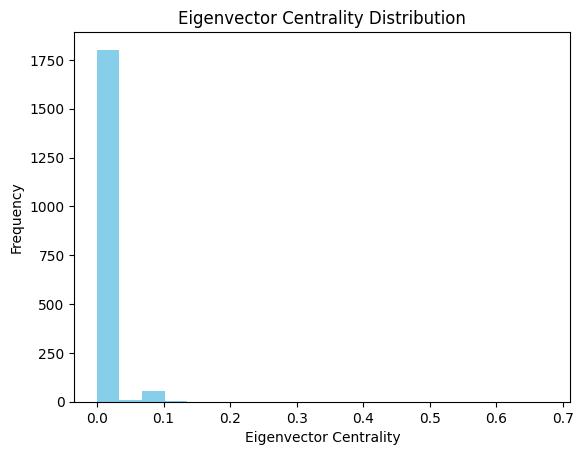


Katz Centrality:
{'1': 0.02670730178967706, '2': 0.026428108664523768, '3': 0.06263744713770285, '4': 0.016838822611625733, '5': 0.022903814766114455, '6': 0.016469103287775698, '113': 0.03475369488134101, '114': 0.024420435378263498, '115': 0.026959219385812597, '116': 0.01482238547876688, '117': 0.01482238547876688, '14': 0.01844331861133087, '139': 0.025388949875218676, '255': 0.02390102685727408, '283': 0.01844331861133087, '319': 0.028454431377738648, '487': 0.022014078032506608, '530': 0.02396801325871511, '642': 0.022922510559242517, '816': 0.029951942216125575, '823': 0.01844331861133087, '1031': 0.030462245556579243, '1082': 0.029397142122235174, '1374': 0.035139518898843564, '1406': 0.03679934446711624, '1425': 0.01844331861133087, '1435': 0.02982986721716806, '1436': 0.01844331861133087, '1437': 0.02898257045377454, '1438': 0.01844331861133087, '1448': 0.01988516869455933, '664': 0.020231997507822366, '801': 0.017390773312902688, '1134': 0.024421978591139624, '1591': 0.0184

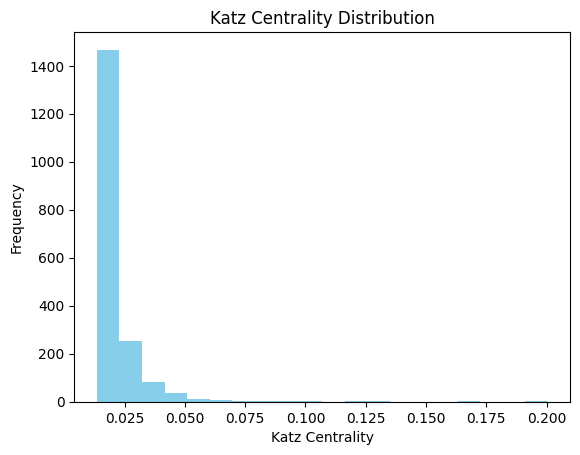


PageRank Centrality:
{'1': 0.0008952971392081363, '2': 0.0011260315307325057, '3': 0.00342753273840552, '4': 0.0004300386883549947, '5': 0.0009494425712399392, '6': 0.0003914192684294114, '113': 0.0005377817260913376, '114': 0.001023585905873483, '115': 0.0003733038686398718, '116': 0.0002394836369220584, '117': 0.0002394836369220584, '14': 0.00022588248897227183, '139': 0.00038333949533829144, '255': 0.0005649844621006982, '283': 0.00022588248897227183, '319': 0.0008887930152344977, '487': 0.000618708390411244, '530': 0.000379602405623699, '642': 0.0009268624664826405, '816': 0.0006122794466047867, '823': 0.00022588248897227183, '1031': 0.0008350163844425945, '1082': 0.0005220031514672006, '1374': 0.00036583917993948645, '1406': 0.0008406575044164623, '1425': 0.00022588248897227183, '1435': 0.0010914553843681357, '1436': 0.00022588248897227183, '1437': 0.0011467034064616185, '1438': 0.00022588248897227183, '1448': 0.0011618513777618502, '664': 0.0008472715383060393, '801': 0.00071540

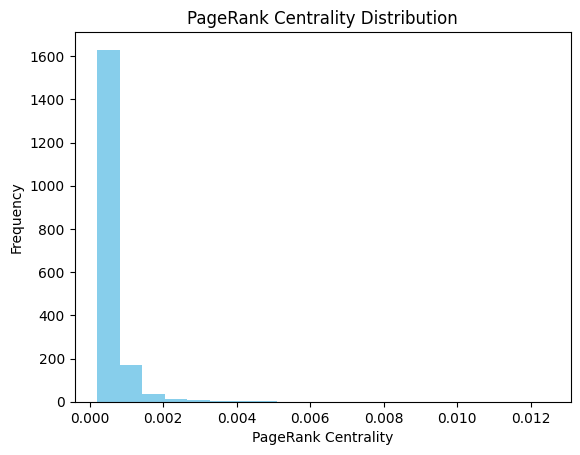


Local Clustering Coefficients:
{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0.1, '6': 0, '113': 0.3333333333333333, '114': 0, '115': 0, '116': 0, '117': 0, '14': 0, '139': 0, '255': 0, '283': 0, '319': 0, '487': 0, '530': 0, '642': 0, '816': 0.3333333333333333, '823': 0, '1031': 0, '1082': 0, '1374': 0, '1406': 0.1, '1425': 0, '1435': 0, '1436': 0, '1437': 0, '1438': 0, '1448': 0, '664': 0, '801': 0, '1134': 0.047619047619047616, '1591': 0.3333333333333333, '1337': 0, '7': 0.3333333333333333, '8': 0.3333333333333333, '9': 0, '10': 1.0, '658': 0, '660': 0, '831': 0, '11': 1.0, '12': 0.6666666666666666, '13': 0.2, '119': 0.09523809523809523, '219': 0, '711': 0, '15': 0, '16': 0, '17': 0, '135': 0, '136': 0, '137': 0, '138': 0, '140': 0, '141': 0, '142': 0, '143': 0, '144': 0.3333333333333333, '145': 0, '146': 0, '147': 0, '148': 0, '149': 0, '150': 0, '151': 0, '152': 0, '153': 0, '154': 0, '155': 0, '156': 0, '157': 0, '158': 0, '185': 0, '428': 0, '1275': 0, '1450': 0, '1511': 0, '1590': 0, 

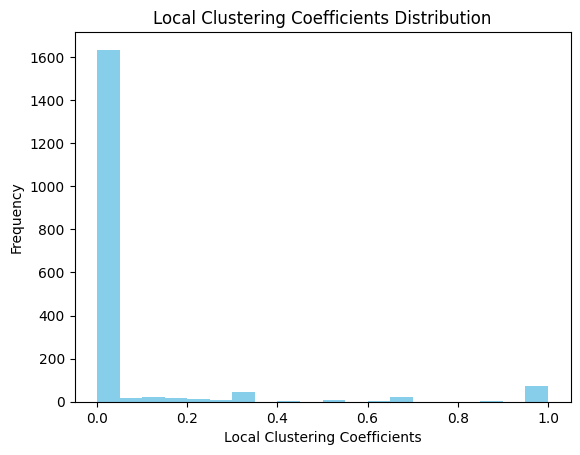


Betweenness Centrality:
{'1': 0.02152047776738422, '2': 0.009651901065174282, '3': 0.04768174711272694, '4': 0.0036270048225356924, '5': 0.015871025036061, '6': 0.0005366565035865067, '113': 0.003401874171308177, '114': 0.007352332818085733, '115': 0.004068390829779108, '116': 0.0, '117': 0.0, '14': 0.0, '139': 0.0059770592179265595, '255': 0.003574384067187982, '283': 0.0, '319': 0.006665997790926502, '487': 0.001113947692334719, '530': 0.0016667706397325128, '642': 0.003332290739359526, '816': 0.004954502231863971, '823': 0.0, '1031': 0.011490737309530066, '1082': 0.00542252429125873, '1374': 0.009522918426620034, '1406': 0.015011461181724625, '1425': 0.0, '1435': 0.007120873291639535, '1436': 0.0, '1437': 0.012002711732040343, '1438': 0.0, '1448': 0.0038904776486839523, '664': 0.007542885745491815, '801': 0.0024999341218093474, '1134': 0.005883312702220994, '1591': 0.0006015121669428624, '1337': 0.0004713474344987241, '7': 0.0017276245209839815, '8': 0.0005585086655900094, '9': 0.0

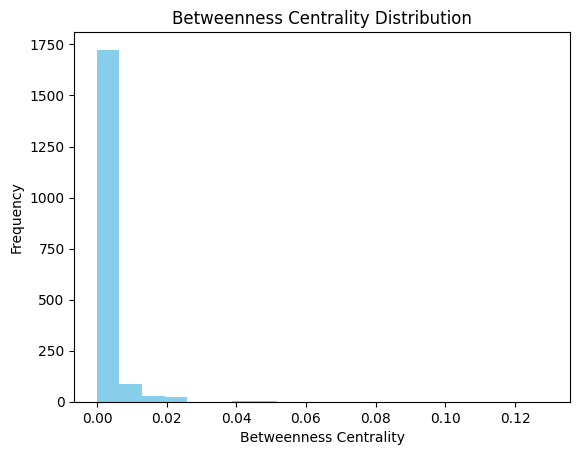


Closeness Centrality:
{'1': 0.1369779015635046, '2': 0.14326699795214176, '3': 0.1566217263878351, '4': 0.11723996281632743, '5': 0.11959784771660315, '6': 0.11858642302825016, '113': 0.15010185803681514, '114': 0.1324263448483829, '115': 0.143502306982259, '116': 0.12103801787772593, '117': 0.12103801787772593, '14': 0.13043417085031925, '139': 0.14086825744320725, '255': 0.1377086275175291, '283': 0.13043417085031925, '319': 0.13858232793613715, '487': 0.13375185583662036, '530': 0.13553947013897136, '642': 0.1305541103177678, '816': 0.13706054781761556, '823': 0.13043417085031925, '1031': 0.1484344955259514, '1082': 0.1466142713004492, '1374': 0.1572723289621407, '1406': 0.14703181356175796, '1425': 0.13043417085031925, '1435': 0.14319475034853504, '1436': 0.13043417085031925, '1437': 0.13858232793613715, '1438': 0.13043417085031925, '1448': 0.10623089784554621, '664': 0.10882636387511545, '801': 0.10375634966333973, '1134': 0.10419418032883039, '1591': 0.10524654927396034, '1337':

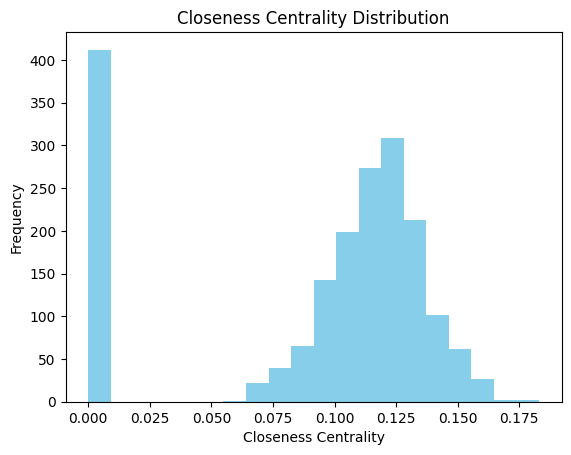


Reciprocity:
0.0

Transitivity:
0.055009498637152064


In [8]:
# Main function
if __name__ == "__main__":
    # Load datasets
    dataset1_path = "D:\SNA_project\download.tsv.opsahl-powergrid\opsahl-powergrid\out.opsahl-powergrid"
    dataset2_path = "D:\SNA_project\download.tsv.moreno_propro\moreno_propro\out.moreno_propro_propro"
    G1 = load_Undirected_Graph(dataset1_path)
    G2 = load_Undirected_Graph(dataset2_path)

    G1_snap = snap.LoadEdgeList(snap.PUNGraph, dataset1_path, 0, 1)
    G2_snap = snap.LoadEdgeList(snap.PUNGraph, dataset2_path, 0, 1)


    # Summarize network statistics
    print("Dataset 1 Statistics:")
    summarize_network_stats(G1)
    print("\nDataset 2 Statistics:")
    summarize_network_stats(G2)

    #Calculate centrality measures
    print("Dataset 1 centrality measures:")
    centrality_measures_1 = calculate_centrality_measures(G1)
    print("\nDataset 2 centrality measures:")
    centrality_measures_2 = calculate_centrality_measures(G2)

 
    # centrality_measures = [
    #     "Degree Centrality", "Eigenvector Centrality", "Katz Centrality",
    #     "PageRank Centrality", "Betweenness Centrality", "Closeness Centrality",
    #     "Reciprocity", "Transitivity"
    # ]
    # #print(f"Visualizing {centrality_measure} for Dataset 1")
    # visualize_centrality_measures(G1, centrality_measures)
    # #print(f"Visualizing {centrality_measure} for Dataset 2")
    # visualize_centrality_measures(G2, centrality_measures)
